In [1]:
import gzip
import shutil
def gunzip_shutil(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'r') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        shutil.copyfileobj(s_file, d_file, block_size)



In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np

In [17]:
# Unzipping files to location 
gunzip_shutil('../Data/Train/calendar.csv.gz', '../Data/Train/hawaii_calender.csv')
gunzip_shutil('../Data/Test_Broward/calendar.csv.gz', '../Data/Test_Broward/broward_calendar.csv')
gunzip_shutil('../Data/Test_Crete/calendar.csv.gz', '../Data/Test_Crete/crete_calendar.csv')


# Read in as csv file calendar 
hawaii_cal = pd.read_csv('../Data/Train/hawaii_calender.csv')
florida_cal  = pd.read_csv('../Data/Test_Broward/broward_calendar.csv')
crete_cal = pd.read_csv('../Data/Test_Crete/crete_calendar.csv')


In [18]:
# Unzipping files to location 
gunzip_shutil('../Data/Train/listings.csv.gz', '../Data/Train/hawaii_listings.csv')
gunzip_shutil('../Data/Test_Broward/listings.csv.gz', '../Data/Test_Broward/broward_listings.csv')
gunzip_shutil('../Data/Test_Crete/listings.csv.gz', '../Data/Test_Crete/crete_listings.csv')


# Read in as csv file calendar 
hawaii_ls = pd.read_csv('../Data/Train/hawaii_listings.csv')
florida_ls = pd.read_csv('../Data/Test_Broward/broward_listings.csv')
crete_ls = pd.read_csv('../Data/Test_Crete/crete_listings.csv')


In [19]:
def replace_str_price(df):
    df.price = df.price.str.replace("$", "").copy()
    df.price = df.price.str.replace(",", "").astype(float)
    if 'adjusted_price' in df.columns:
        df.adjusted_price = df.adjusted_price.str.replace("$", "")
        df.adjusted_price = df.adjusted_price.str.replace(",", "").astype(float)
    
    return df 


In [20]:
hawaii = replace_str_price(hawaii_ls)
hawaii_cal_copy = hawaii_cal.copy()
hawaii_cal = replace_str_price(hawaii_cal_copy)
hawaii_cal['datetime'] = pd.to_datetime(hawaii_cal.date)

<ipython-input-19-b2e989940833>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.price = df.price.str.replace("$", "").copy()
<ipython-input-19-b2e989940833>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.adjusted_price = df.adjusted_price.str.replace("$", "")


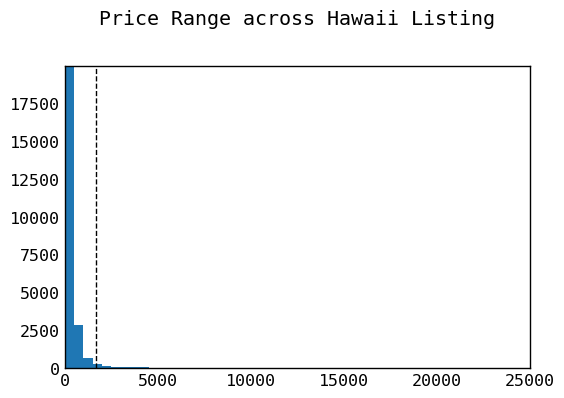

In [62]:
plt.hist(hawaii['price'],bins =50)
plt.axvline(447+1234, color='k', linestyle='dashed', linewidth=1)
plt.title('Price Range across Hawaii Listing')
plt.show()

In [22]:
hawaii['log_price'] = np.log(hawaii['price']+1)

## Price for different property types

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

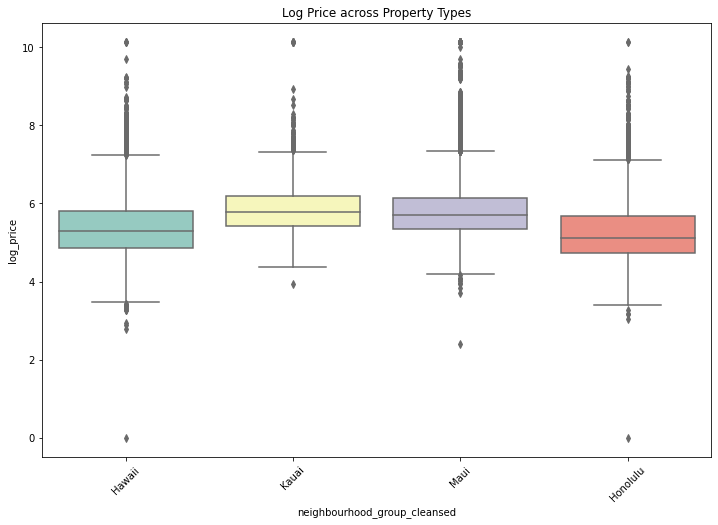

In [23]:
# Plots for each neighbourhood v.s. log price 

a = hawaii.groupby(
    ["neighbourhood_group_cleansed"], as_index=False
).agg(
    avg_price = ("log_price", "mean"),
    qty = ("log_price", "count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)




import seaborn as sns
plt.figure(figsize = (12,8))

ax = sns.boxplot(x="neighbourhood_group_cleansed", y="log_price", 
                 data=hawaii, palette="Set3")
plt.title('Log Price across Property Types')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

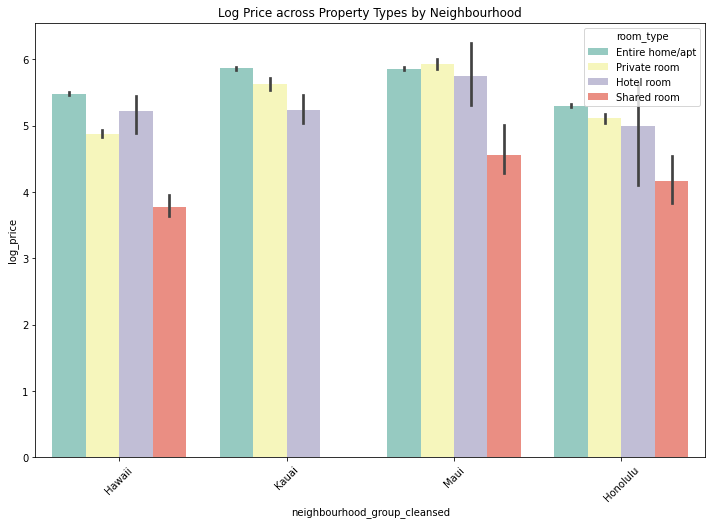

In [25]:
# Plots for each neighbourhood v.s. log price by room type
plt.figure(figsize = (12,8))

ax = sns.barplot(x="neighbourhood_group_cleansed", y="log_price", hue = 'room_type' ,
                 data=hawaii, palette="Set3")
plt.title('Log Price across Property Types by Neighbourhood')
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees


## Most Frequent Amenities

In [181]:
## The part where we count the amenities 

t = hawaii['amenities'].apply(lambda x: eval(x.lower()))
j_list = []
for i in range(len(t)):
    j_list+=t[i]
from collections import Counter
x = Counter(j_list)
x.most_common(30)

[('wifi', 23488),
 ('kitchen', 22003),
 ('long term stays allowed', 21534),
 ('hair dryer', 21441),
 ('smoke alarm', 21103),
 ('essentials', 20627),
 ('iron', 19661),
 ('hangers', 19247),
 ('coffee maker', 18771),
 ('microwave', 18539),
 ('washer', 18064),
 ('dishes and silverware', 18024),
 ('dryer', 17609),
 ('refrigerator', 17524),
 ('free parking on premises', 17254),
 ('shampoo', 16884),
 ('air conditioning', 16805),
 ('hot water', 16716),
 ('bed linens', 14959),
 ('cooking basics', 14293),
 ('dedicated workspace', 14161),
 ('oven', 14031),
 ('stove', 13974),
 ('private entrance', 13952),
 ('fire extinguisher', 13726),
 ('cable tv', 13669),
 ('tv with standard cable', 13023),
 ('pool', 12974),
 ('dishwasher', 12161),
 ('bbq grill', 11648)]

## Perecent Availablity For Dates

In [ ]:
import datetime

In [ ]:
hawaii_cal['weekday'] =  hawaii_cal['datetime'].apply( lambda x: x.strftime('%A'))
hawaii_cal['month'] =  hawaii_cal['datetime'].apply( lambda x: x.strftime('%B'))
hawaii_cal['year'] =  hawaii_cal['datetime'].dt.year

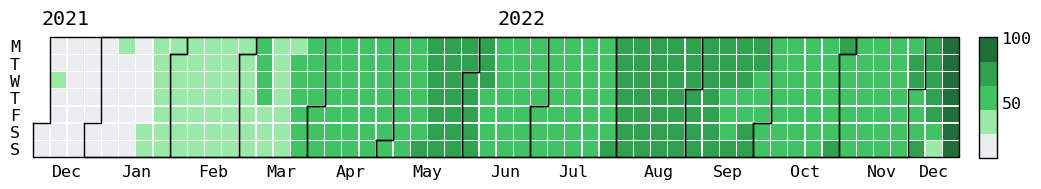

In [29]:
import july
from july.utils import date_range

# convert availability to 
hawaii_cal['available'] =  hawaii_cal['available'].apply( lambda x: 0 if x =='f' else 1)

# Aggregating Hawaii Calendar Data by Dates 
# We want to see the percentage of availbility 
a2 = hawaii_cal.groupby(
    ['datetime'], as_index=False
).agg(
    avg_price = ("adjusted_price", "mean"),
    qty = ("listing_id", 'count'),
    availablity = ('available', 'sum')
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)
a2['percentage'] = a2['availablity']/ a2['qty'] *100




# Plot the availability percentage across year
july.heatmap(dates=a2.datetime, 
             data=a2.percentage, 
             cmap='github',
             month_grid=True, 
             horizontal=True,
             value_label=False,
             date_label=False,
             weekday_label=True,
             month_label=True, 
             year_label=True,
             colorbar=True,
             fontfamily="monospace",
             fontsize=12,
             title=None,
             titlesize='large',
             dpi=100)